<a href="https://colab.research.google.com/github/fayruzkibria/wine-quality-KNN-classifier/blob/main/wineQualityKNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### December 13, 2021
### Fayruz Kibria


---



In [ ]:
#pip install plotnine

import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

import plotnine
from plotnine import *
from plotnine.data import *
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

# Import dataset

---



In [ ]:
# Import dataset
mydata0 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
mydata=mydata0.copy()

# View the first few rows of the data
mydata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
mydata.shape

(4898, 12)

In [ ]:
mydata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Q1. Check the datatypes of the attributes. (3 points)

---



In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Q2. Are there any missing values in the dataset? (4 points)

---



In [ ]:
mVal = mydata.isnull().sum().sum()

print("There are",mVal,"missing values in the data set.")

There are 0 missing values in the data set.


# Q3. What is the correlation between the attributes other than Quality? (10 points)


---



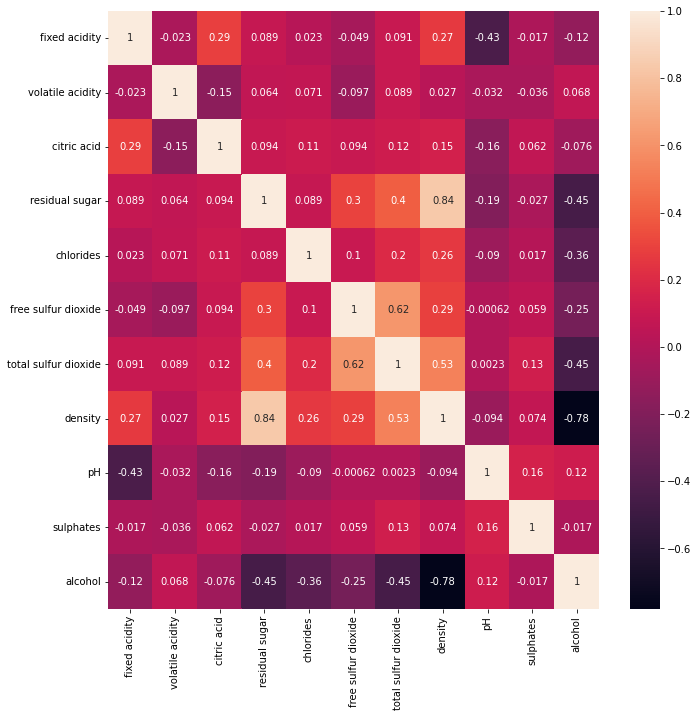

In [ ]:
mydata_nolabel = mydata.iloc[:, 0:11]
corrMatrix = mydata_nolabel.corr()
plt.figure(figsize = (11,11))
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Q4. Graph the frequency distribution of wine quality by using Quality. (10 points)

---



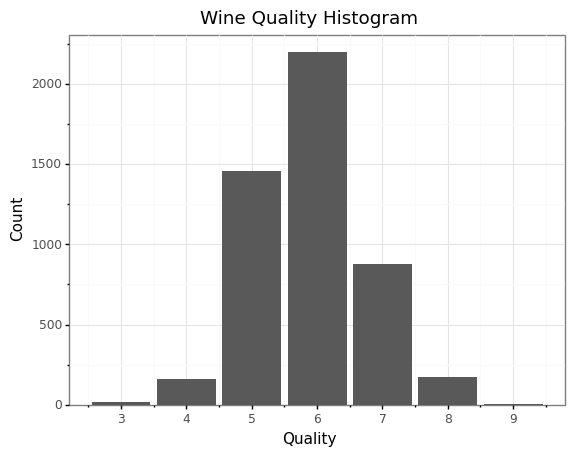

<ggplot: (8764816313513)>


In [ ]:
quality_hist = ggplot(mydata, aes(x='quality')) + geom_bar() \
    + ggtitle('Wine Quality Histogram')  \
    + scale_x_continuous(breaks= [3, 4, 5, 6, 7, 8, 9], labels= ["3", "4", "5", "6", "7", "8", "9"]) \
    + scale_y_continuous(expand = [0,0.5], limits = [0, 2300]) \
    + xlab("Quality") \
    + ylab("Count") \
    +theme_bw()

print(quality_hist)

# Q5. Reduce the levels of rating for quality to three levels as high, medium and low. (10 points)
Assign the levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7 ,8 and 9 to level 2 . 

---




In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

# re mapping the quality ratings to 3 categories only

mydata.quality.loc[mydata.quality==3]=0
mydata.quality.loc[mydata.quality==4]=0
mydata.quality.loc[mydata.quality==5]=1
mydata.quality.loc[mydata.quality==6]=1
mydata.quality.loc[mydata.quality==7]=2
mydata.quality.loc[mydata.quality==8]=2
mydata.quality.loc[mydata.quality==9]=2


In [ ]:
# making quality a categorical variable

mydata['quality_categorical'] = mydata.quality.astype("category")
mydata.drop(['quality'], axis = 1, inplace=True)

mydata.info()
mydata.head() # checking the numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality_categorical   4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 426.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_categorical
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [ ]:
mydata['quality_categorical'].value_counts() # checking the categorical quality column

1    3655
2    1060
0     183
Name: quality_categorical, dtype: int64

# Q6. Normalize the numeric attributes. (12 points)

---



In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

scaled_df = pd.DataFrame(min_max_scaler.fit_transform(mydata.iloc[:, 0:11])) # scaling the numeric columns and saving in a ned scaled dataframe
scaled_df['quality_categorical'] = mydata.quality_categorical # adding the categorical quality column to the scaled dataframe
scaled_df.columns = mydata.columns # copying the columns names over to the scaled dataframe

#scaled_df.head()
scaled_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Q7. Divide the dataset to training and test sets. (12 points)

---



In [ ]:
label_col=scaled_df['quality_categorical'] # defining the label column
data_col=scaled_df.iloc[:, 0:11] # defining the numerical columns

x_train, x_test, y_train, y_test = train_test_split(data_col, label_col, test_size=0.3,random_state=109) # 70-30 train test split, and a random seed to start

print("The train set has",len(x_train),"data rows")
print("The test set has",len(x_test),"data rows")

The train set has 3428 data rows
The test set has 1470 data rows


# Q8. Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

---



In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5) # using KNN classifier with 5 nearest neighbours
classifier.fit(x_train, y_train) # fitting data to train

y_pred = classifier.predict(x_test) # getting prediction from test data 
y_pred # predicted test labels

array([2, 1, 2, ..., 1, 1, 1])

# Q9. Display the confusion matrix to evaluate the model performance. (12 points)

---




                Confusion Matrix



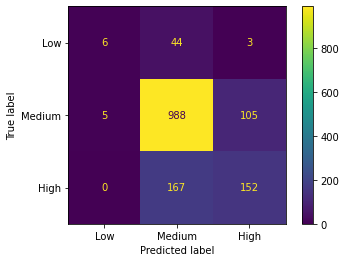

In [ ]:
confmat = confusion_matrix(y_test, y_pred) # confusion matrix from actual and predicted test labels
print ("                Confusion Matrix\n")
ConfusionMatrixDisplay(confmat, display_labels = ['Low','Medium','High']).plot(); # displaying confusion matrix


# Q10. Evaluate the model performance by computing Accuracy, Sensitivity and Specificity. (15 points)

---



In [ ]:
n00, n01, n02, n10, n11, n12, n20, n21, n22 = confmat.ravel() # saving all the confusion matrix data into labelled variables for ease of use

accuracy = round(sum([n00, n11, n22]) / sum([n00, n01, n02, n10, n11, n12, n20, n21, n22]), 2) # calculating accuracy

sensitivity0 = round(n00 / sum([n00, n01, n02]), 2) # calculating sensitivities
sensitivity1 = round(n11 / sum([n10, n11, n12]), 2)
sensitivity2 = round(n22 / sum([n20, n21, n22]), 2)

specificity0 = round(sum([n11,n12,n21,n22]) / sum([n10, n11, n12, n20, n21, n22]), 2) # calculating specificities
specificity1 = round(sum([n00,n02,n20,n22]) / sum([n00, n01, n02, n20, n21, n22]), 2)
specificity2 = round(sum([n00,n01,n10,n11]) / sum([n00, n01, n02, n10, n11, n12]), 2)

# print all values

print("accuracy =",accuracy)

print("\nsensitivity Low =",sensitivity0)
print("sensitivity Medium =",sensitivity1)
print("sensitivity High =",sensitivity2)

print("\nspecificity Low =",specificity0)
print("specificity Medium =",specificity1)
print("specificity High =",specificity2)


accuracy = 0.78

sensitivity Low = 0.11
sensitivity Medium = 0.9
sensitivity High = 0.48

specificity Low = 1.0
specificity Medium = 0.43
specificity High = 0.91


In [ ]:
print(classification_report(y_test, y_pred)) # check calculated sensitivities and accuracy with the report output

              precision    recall  f1-score   support

           0       0.55      0.11      0.19        53
           1       0.82      0.90      0.86      1098
           2       0.58      0.48      0.53       319

    accuracy                           0.78      1470
   macro avg       0.65      0.50      0.52      1470
weighted avg       0.76      0.78      0.76      1470

